In [6]:
!pip install numpy


Defaulting to user installation because normal site-packages is not writeable


Average reward: 0.713
Fraction of optimal actions: 0.586


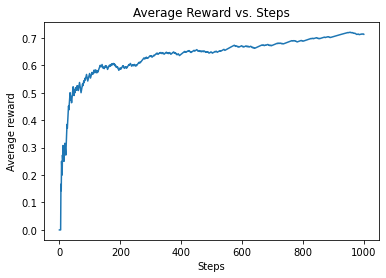

True action values: [0.39316545 0.37515835 0.61441173 0.3913701  0.42844999 0.87043427
 0.30044322 0.61558215 0.40637455 0.4218427 ]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

class BinaryBandit:
    def __init__(self, k, true_action_values):
       
        self.k = k
        self.true_action_values = true_action_values
        self.best_action = np.argmax(true_action_values)

    def step(self, action):
       
        reward = 1 if np.random.rand() < self.true_action_values[action] else 0
        return reward

# UCB Algorithm
class UCB:
    def __init__(self, bandit):
       
        self.bandit = bandit
        self.action_values = np.zeros(bandit.k)  # Estimated action values
        self.action_counts = np.zeros(bandit.k)  # Number of times each action was taken
        self.total_steps = 0

    def select_action(self):
       
        if self.total_steps < self.bandit.k:
            return self.total_steps
        else:
            ucb_values = self.action_values + np.sqrt(2 * np.log(self.total_steps) / (self.action_counts + 1e-5))
            return np.argmax(ucb_values)

    def update_action_value(self, action, reward):
       
        self.action_counts[action] += 1
        self.action_values[action] += (reward - self.action_values[action]) / self.action_counts[action]
        self.total_steps += 1

# Run the simulation
def run_simulation(k=10, num_steps=1000):
    true_action_values = np.random.uniform(0, 1, k)
    
    bandit = BinaryBandit(k, true_action_values)
    agent = UCB(bandit)
    
    rewards = np.zeros(num_steps)
    optimal_action_counts = np.zeros(num_steps)
    
    for t in range(num_steps):
        action = agent.select_action()
        reward = bandit.step(action)
        agent.update_action_value(action, reward)
        
        rewards[t] = reward
        optimal_action_counts[t] = (action == bandit.best_action)
    
    avg_reward = np.mean(rewards)
    optimal_action_fraction = np.mean(optimal_action_counts)
    
    return rewards, avg_reward, optimal_action_fraction, true_action_values

k = 10  # Number of arms
num_steps = 1000  # Number of steps in the simulation

rewards, avg_reward, optimal_action_fraction, true_action_values = run_simulation(k, num_steps)

print(f"Average reward: {avg_reward}")
print(f"Fraction of optimal actions: {optimal_action_fraction}")

plt.plot(np.cumsum(rewards) / np.arange(1, num_steps + 1))
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Average Reward vs. Steps')
plt.show()

# Print the true action values
print(f"True action values: {true_action_values}")
